**Exploratory Data Analysis (EDA):** Take a messy dataset (from sources like Kaggle, UCI Machine Learning Repository, or a public API) and clean, analyze, and visualize it. Your goal is to tell a compelling story with the data.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
data = pd.read_csv(r'C:\Users\sadiq\OneDrive\Documents\Dataset files\fifa21 raw data v2.csv')


C:\Users\sadiq\AppData\Local\Temp\ipykernel_27608\747203725.py:6: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\sadiq\OneDrive\Documents\Dataset files\fifa21 raw data v2.csv')


In [38]:
# Display the first 5 rows
print(data.head())

       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slo

In [39]:

# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [40]:
# Check for missing values or data types
print(data.describe())

                  ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min

1. Understand the Dataset

Rows: 18,979 players

Columns: 77 features

Types:

Numerical: Age, OVA (Overall Rating), POT (Potential), stats (PAC, SHO, PAS, DRI, DEF, PHY, etc.)

Categorical: Name, Nationality, Club, Positions, Preferred Foot, etc.

Mixed/object (need cleaning): Height, Weight, Value, Wage, Release Clause, etc.

Load_date is a fixed date value

2. Issues spotted:

Remove the 

Some monetary values (Value, Wage, Release Clause) are stored as strings with symbols (€).

Height & Weight are stored as strings (5'11", 176lbs) instead of numeric.

Missing values in Loan Date End and Hits.

3. Data Cleaning

Convert:

Height → cm

Weight → kg

Value, Wage, Release Clause → numeric (handle K = thousands, M = millions).

Handle missing:

IR → stars to int

Loan Date End → fill with "Not on loan" or NaN.

Hits → convert to numeric, impute or keep NaN.

Strip whitespace from categorical features like Club.

In [41]:
##IR → stars to int
def _stars_to_int(s):
    # "5 ★" -> 5 ; "3★" -> 3
    if pd.isna(s): return np.nan
    m = re.search(r"(\d+)", str(s))
    return int(m.group(1)) if m else np.nan

data["IR"] = data["IR"].apply(_stars_to_int)
print(data["IR"].head(10))

0    5
1    5
2    3
3    4
4    5
5    4
6    3
7    3
8    3
9    3
Name: IR, dtype: int64


In [42]:
## Removed Club column
data.drop(columns=['Club'], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Contract          18979 non-null  object
 10  Positions         18979 non-null  object
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  Preferred Foot    18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  Best Position     18979 non-null  object
 16  Joined            18979 non-null  object
 17  Loan Date En

In [43]:
## Convert Hits Nan value to 0
data["Hits"] = data["Hits"].fillna(0)
print(data["Hits"])

0        771
1        562
2        150
3        207
4        595
        ... 
18974      0
18975      0
18976      0
18977      0
18978      0
Name: Hits, Length: 18979, dtype: object


In [44]:
## Loan Date End filling with Not a loan if empty
data["Loan Date End"] = data["Loan Date End"].fillna("Not a loan")
print(data["Loan Date End"])

0        Not a loan
1        Not a loan
2        Not a loan
3        Not a loan
4        Not a loan
            ...    
18974    Not a loan
18975    Not a loan
18976    Not a loan
18977    Not a loan
18978    Not a loan
Name: Loan Date End, Length: 18979, dtype: object


In [45]:
## Standardized Height to cm
def _height_to_cm(s):
    # Handles 5'11" style and also "180cm" or plain numbers
    if pd.isna(s): return np.nan
    s = str(s).strip().lower()
    # e.g., 5'11" or 6'2
    m = re.match(r"^(\d+)\s*'\s*(\d+)(?:\"?)", s)
    if m:
        feet = int(m.group(1))
        inches = int(m.group(2))
        return round((feet*12 + inches) * 2.54, 1)
    # e.g., 6' or 6’ (no inches)
    m2 = re.match(r"^(\d+)\s*['’]$", s)
    if m2:
        feet = int(m2.group(1))
        return round((feet*12) * 2.54, 1)
    # e.g., "180cm"
    m3 = re.match(r"^(\d+(?:\.\d+)?)\s*cm$", s)
    if m3:
        return float(m3.group(1))
    # just a number? assume cm if reasonable
    m4 = re.match(r"^(\d+(?:\.\d+)?)$", s)
    if m4:
        val = float(m4.group(1))
        return val if 120 <= val <= 220 else np.nan
    return np.nan

data['Height'] = data['Height'].apply(_height_to_cm)
print(data['Height'])

0        170.0
1        187.0
2        188.0
3        181.0
4        175.0
         ...  
18974    178.0
18975    175.0
18976    179.0
18977    175.0
18978    188.0
Name: Height, Length: 18979, dtype: float64


In [46]:
## Standardized Weight to kg
def _weight_to_kg(s):
    # Handles "180lbs" or "82kg" or plain numbers
    if pd.isna(s): return np.nan
    s = str(s).strip().lower()
    # e.g., "180lbs"
    m = re.match(r"^(\d+(?:\.\d+)?)\s*lbs?$", s)
    if m:
        lbs = float(m.group(1))
        return round(lbs * 0.45359237, 1)
    # e.g., "82kg"
    m2 = re.match(r"^(\d+(?:\.\d+)?)\s*kg$", s)
    if m2:
        return float(m2.group(1))
    # just a number? assume kg if reasonable
    m3 = re.match(r"^(\d+(?:\.\d+)?)$", s)
    if m3:
        val = float(m3.group(1))
        return val if 40 <= val <= 150 else np.nan
    return np.nan

data['Weight'] = data['Weight'].apply(_weight_to_kg)
print(data['Weight'])


0        72.0
1        83.0
2        87.0
3        70.0
4        68.0
         ... 
18974    66.0
18975    65.0
18976    74.0
18977    69.0
18978    75.0
Name: Weight, Length: 18979, dtype: float64


In [47]:
##Standardized Value, Wage, Release Clause to float (in Euros)
_money_rx = re.compile(r"[€$£,\s]")
def _parse_money_to_float(s):
    # Handles "€110.5M", "€60K", "€1,200,000" -> float in Euros
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s == "" or s.lower() in {"nan", "na"}:
        return np.nan
    base = _money_rx.sub("", s)  # remove symbols/commas/spaces
    mult = 1.0
    if base.endswith(("M","m")):
        mult = 1_000_000.0
        base = base[:-1]
    elif base.endswith(("K","k")):
        mult = 1_000.0
        base = base[:-1]
    try:
        return float(base) * mult
    except:
        return np.nan
    
data['Value'] = data['Value'].apply(_parse_money_to_float)
data['Wage'] = data['Wage'].apply(_parse_money_to_float)
data['Release Clause'] = data['Release Clause'].apply(_parse_money_to_float)
print(data[['Value','Wage','Release Clause']])

             Value      Wage  Release Clause
0      103500000.0  560000.0     138400000.0
1       63000000.0  220000.0      75900000.0
2      120000000.0  125000.0     159400000.0
3      129000000.0  370000.0     161000000.0
4      132000000.0  270000.0     166500000.0
...            ...       ...             ...
18974     100000.0    1000.0         70000.0
18975     130000.0     500.0        165000.0
18976     120000.0     500.0        131000.0
18977     100000.0    2000.0         88000.0
18978     100000.0    1000.0         79000.0

[18979 rows x 3 columns]


4. Descriptive Statistics

Numerical Summary: Already given (mean, std, min, max).

Average Age ≈ 25 years

Average OVA ≈ 66, max = 93 (Messi)

POT > OVA (Offensive Value Added - measures a player’s attacking contribution in numbers) → potential growth.

Categorical Summary:

Top nationalities (likely England, Spain, Germany, France).

Top players and their best positions

Number of players on each postion (which postion is mostly preferable)

Distribution of Preferred Foot (Left vs Right).

Which players are highly valuable but still underpaid (on low wages)? 


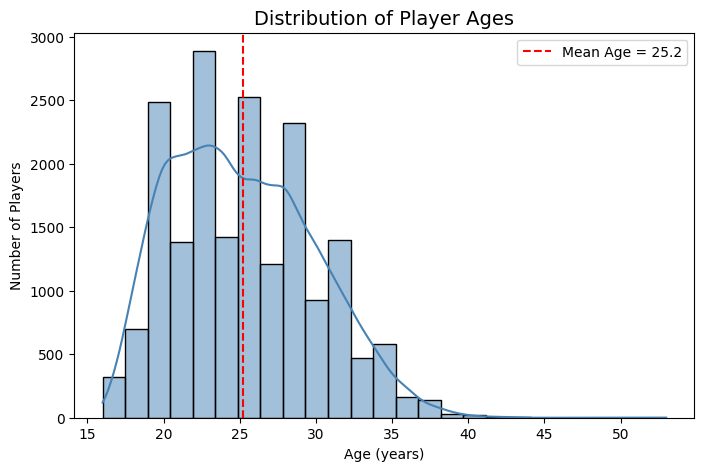

In [48]:
##Age Distribution of Players
plt.figure(figsize=(8,5))
sns.histplot(data["Age"], bins=25, kde=True, color="steelblue", edgecolor="black")
plt.axvline(data["Age"].mean(), color="red", linestyle="--", label=f"Mean Age = {data['Age'].mean():.1f}")
plt.title("Distribution of Player Ages", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Number of Players")
plt.legend()
plt.show()


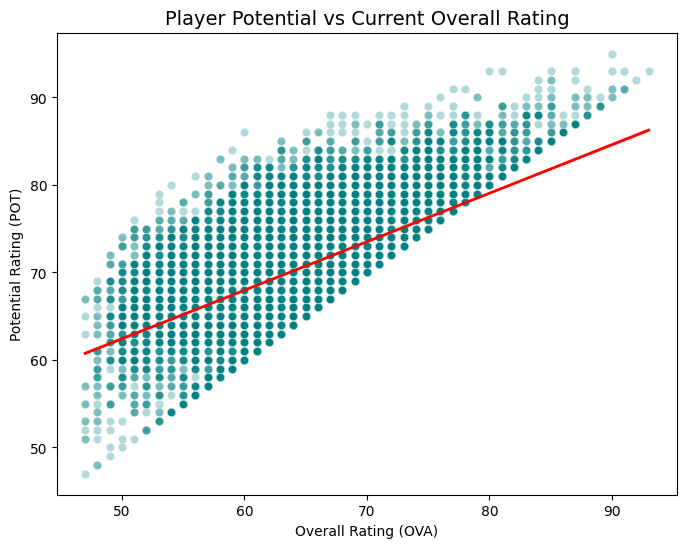

In [49]:
##OVA vs POT
plt.figure(figsize=(8,6))
sns.scatterplot(x="↓OVA", y="POT", data=data, alpha=0.3, color="teal")
sns.regplot(x="↓OVA", y="POT", data=data, scatter=False, color="red", line_kws={"lw":2})
plt.title("Player Potential vs Current Overall Rating", fontsize=14)
plt.xlabel("Overall Rating (OVA)")
plt.ylabel("Potential Rating (POT)")
plt.show()

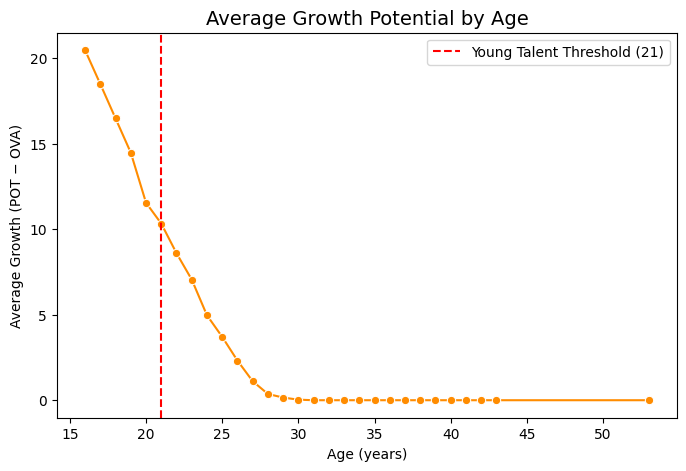

In [50]:
##Growth Potential by Age
data["growth"] = data["POT"] - data["↓OVA"]
growth_by_age = data.groupby("Age")["growth"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=growth_by_age, x="Age", y="growth", marker="o", color="darkorange")
plt.title("Average Growth Potential by Age", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Average Growth (POT − OVA)")
plt.axvline(21, color="red", linestyle="--", label="Young Talent Threshold (21)")
plt.legend()
plt.show()


C:\Users\sadiq\AppData\Local\Temp\ipykernel_27608\1340259156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nations.values, y=top_nations.index, palette="viridis")


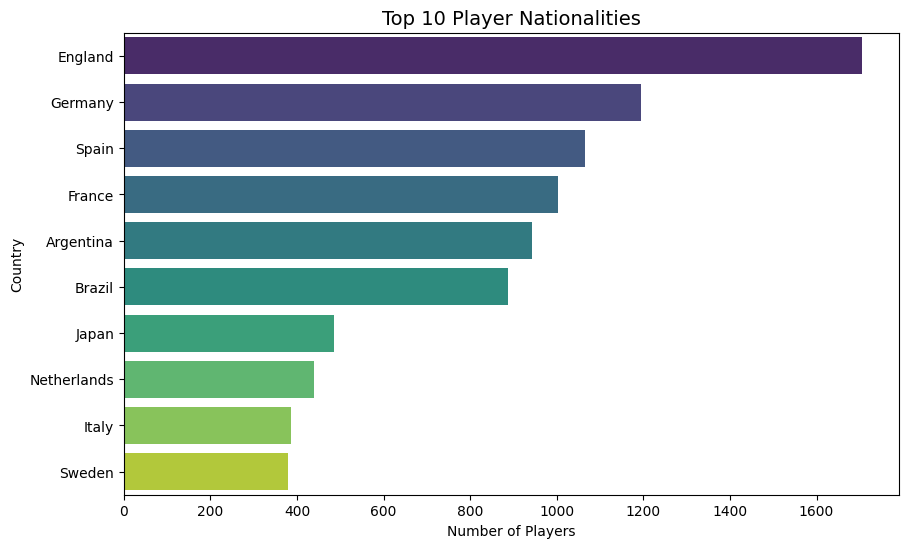

In [51]:
##Top nations by Player Count
top_nations = data["Nationality"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_nations.values, y=top_nations.index, palette="viridis")
plt.title("Top 10 Player Nationalities", fontsize=14)
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

#print(players_per_nation.sort_values(ascending=False).head(10))


In [52]:
##Top players based on their ↓OVA and their best positions
top_players = data.sort_values(by="↓OVA", ascending=False)[["Name", "↓OVA", "Best Position"]].head(20)
print(top_players)


                 Name  ↓OVA Best Position
0            L. Messi    93            RW
1   Cristiano Ronaldo    92            ST
4           Neymar Jr    91            LW
5      R. Lewandowski    91            ST
2            J. Oblak    91            GK
3        K. De Bruyne    91           CAM
9       M. ter Stegen    90            GK
7             Alisson    90            GK
6            M. Salah    90            RW
8           K. Mbappé    90            ST
11            S. Mané    90            LW
10        V. van Dijk    90            CB
15         K. Benzema    89            CF
14           M. Neuer    89            GK
16       Sergio Ramos    89            CB
17          S. Agüero    89            ST
12           Casemiro    89           CDM
13        T. Courtois    89            GK
25       K. Koulibaly    88            CB
26          E. Hazard    88            LW


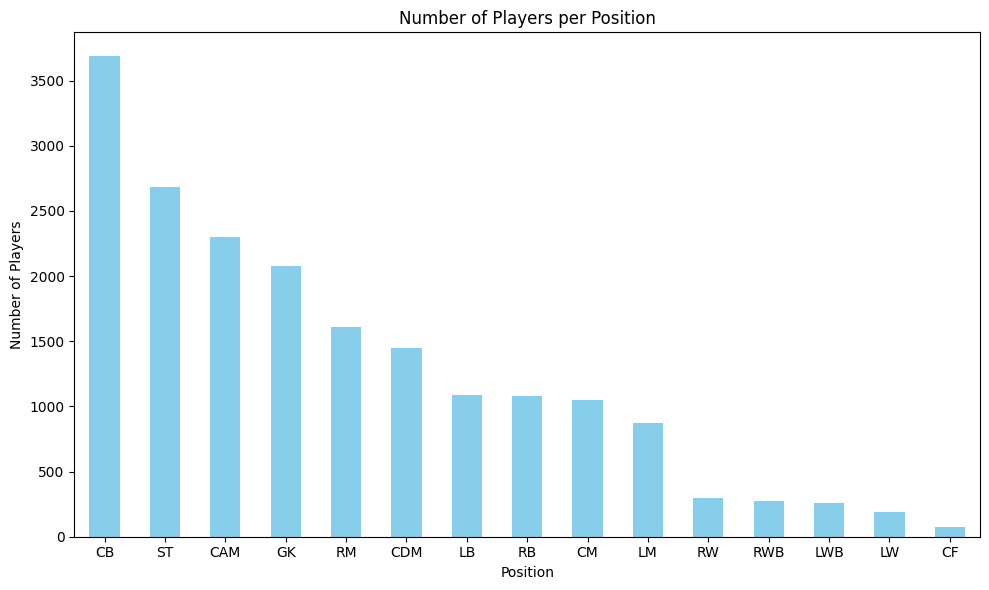

In [53]:
##Number of players on each postion (which postion is mostly preferable)
positions = data["Best Position"].value_counts()

positions.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Number of Players per Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

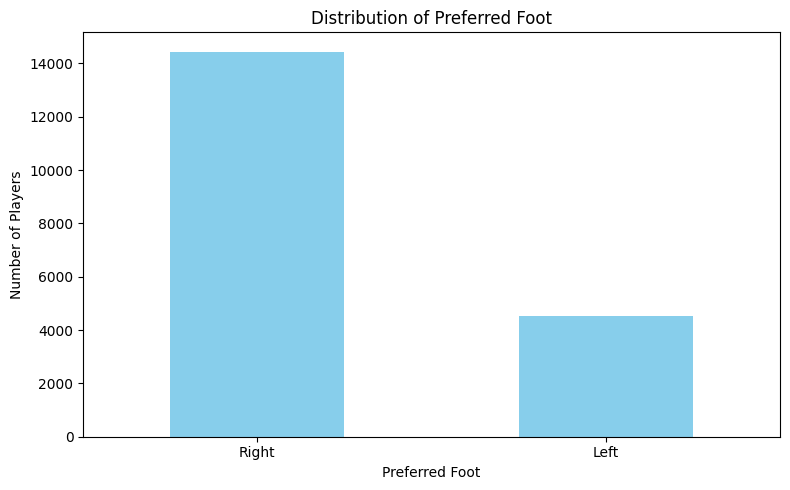

In [54]:
##Distribution of Preferred Foot (Left vs Right)
preferred_foot_counts = data["Preferred Foot"].value_counts()
preferred_foot_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Distribution of Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [55]:
##Which players are highly valuable but still underpaid (on low wages and high performance)?
high_value_low_wage = data[(data['Value'] > 50_000_000) & (data['Wage'] < 100_000)][['Name', 'Value', 'Wage', '↓OVA']]
print(high_value_low_wage)

                    Name        Value     Wage  ↓OVA
29             J. Sancho  124000000.0  82000.0    87
63   S. Milinković-Savić   74500000.0  95000.0    85
66            M. de Ligt   99000000.0  81000.0    85
69         G. Donnarumma   93500000.0  34000.0    85
84                  Koke   54000000.0  90000.0    85
99              W. Ndidi   55000000.0  95000.0    84
100           J. Giménez   52500000.0  71000.0    84
102            J. Brandt   60500000.0  75000.0    84
103            Oyarzabal   66500000.0  47000.0    84
105           E. Haaland   92000000.0  56000.0    84
107             K. Coman   60500000.0  95000.0    84
108             Grimaldo   56000000.0  20000.0    84
110              N. Süle   57500000.0  84000.0    84
115                 Saúl   55500000.0  78000.0    84
142            A. Hakimi   56000000.0  90000.0    83
228             Reguilón   58000000.0  85000.0    82
274             H. Aouar   57500000.0  65000.0    81
276            Cucurella   58000000.0  28000.0

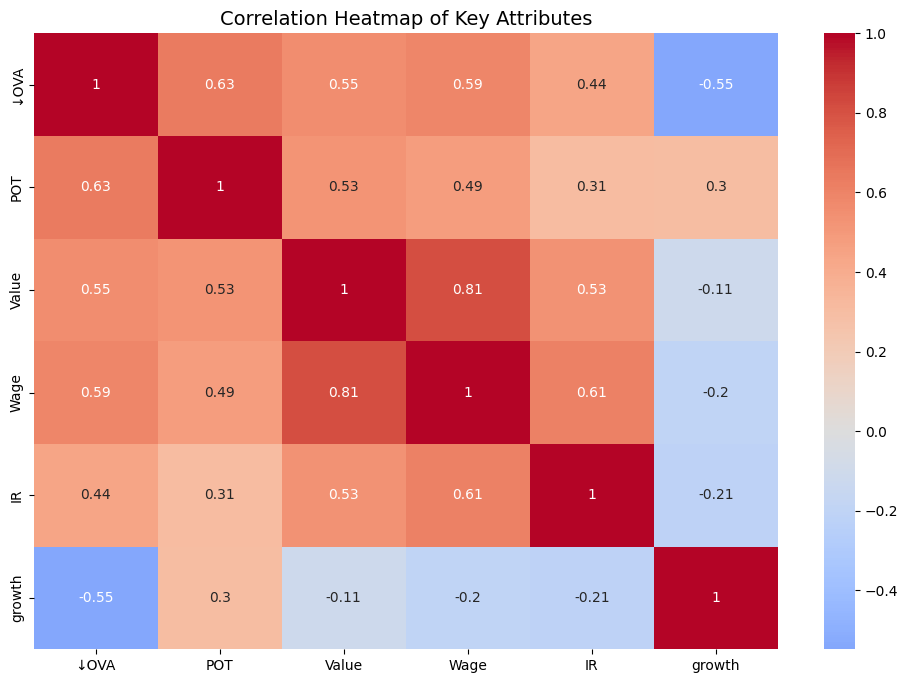

In [56]:
plt.figure(figsize=(12,8))
corr = data[["↓OVA","POT","Value","Wage","IR","growth"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Key Attributes", fontsize=14)
plt.show()


5. Conclusion
The dataset confirms that most players have room for growth (POT > OVA), with younger players showing the highest development margins.

Countries known for football such as England, Argentina and so on seems to have a huge number of players. 

However, some underrated players with huge potential such as E. Haaland and Richarlison are also underpaid. 